### PART 3: Programming Exercises

#### Problem 1: Active constraints

#### Problem 1.1 — Define functions to check if constraint $c_i$ is verified at $x$

Constraints:
- $c_1(x) = x_1 + x_2 \geq 3$
- $c_2(x) = x_1 + 2x_2 \leq 6$
- $c_3(x) = x_1 \geq 1$
- $c_4(x) = x_2 \geq 1$

In [71]:
def is_c1_verified(x):
    return x[0] + x[1] >= 3

def is_c2_verified(x):
    return x[0] + 2 * x[1] <= 6

def is_c3_verified(x):
    return x[0] >= 1

def is_c4_verified(x):
    return x[1] >= 1

#### Problem 1.2 — Check if $x$ is feasible by verifying all constraints

In [72]:
def is_feasible(x):
    return is_c1_verified(x) and is_c2_verified(x) and is_c3_verified(x) and is_c4_verified(x)

#### Problem 1.3 — Test feasibility of $x_0 = (1,2)$ and $x_1 = (3,1.2)$

In [73]:
x0 = (1, 2)
x1 = (3, 1.2)

print("x0 is feasible?", is_feasible(x0))
print("x1 is feasible?", is_feasible(x1))

x0 is feasible? True
x1 is feasible? True


#### Problem 1.4 — Define functions to check if constraint $c_i$ is active at $x$

In [74]:
def is_c1_active(x, tol=1e-8):
    return abs(x[0] + x[1] - 3) < tol

def is_c2_active(x, tol=1e-8):
    return abs(x[0] + 2*x[1] - 6) < tol

def is_c3_active(x, tol=1e-8):
    return abs(x[0] - 1) < tol

def is_c4_active(x, tol=1e-8):
    return abs(x[1] - 1) < tol

#### Problem 1.5 — Find active constraints at $x_0$ and $x_1$

In [75]:
def get_active_constraints(x):
    active = []
    if is_c1_active(x): active.append("c1")
    if is_c2_active(x): active.append("c2")
    if is_c3_active(x): active.append("c3")
    if is_c4_active(x): active.append("c4")
    return active

print("Active constraints at x0:", get_active_constraints(x0))
print("Active constraints at x1:", get_active_constraints(x1))

Active constraints at x0: ['c1', 'c3']
Active constraints at x1: []


#### Problem 1.6 — Plot the feasible region $\Omega$ defined by 4 constraints

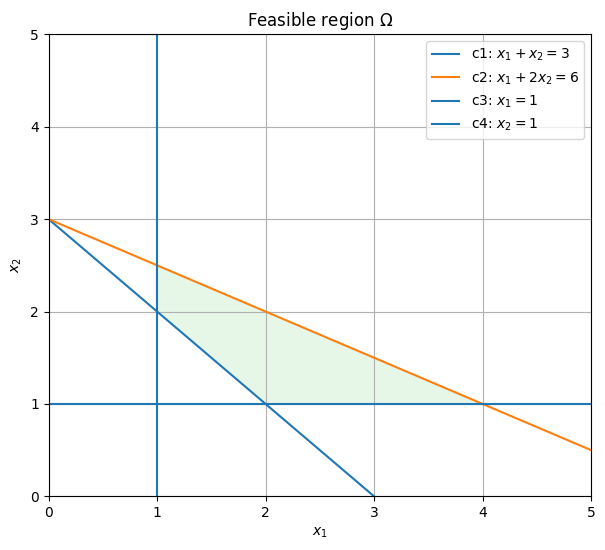

In [76]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(0, 5, 400)
plt.figure(figsize=(7, 6))

# Constraint lines
plt.plot(x_vals, 3 - x_vals, label="c1: $x_1 + x_2 = 3$")
plt.plot(x_vals, (6 - x_vals)/2, label="c2: $x_1 + 2x_2 = 6$")
plt.axvline(1, label="c3: $x_1 = 1$")
plt.axhline(1, label="c4: $x_2 = 1$")

# Fill feasible region
x = np.linspace(0, 5, 400)
y = np.linspace(0, 5, 400)
X, Y = np.meshgrid(x, y)
mask = (X + Y >= 3) & (X + 2*Y <= 6) & (X >= 1) & (Y >= 1)
plt.contourf(X, Y, mask, levels=[0.5, 1], colors=["#d0f0d0"], alpha=0.5)

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title(r"Feasible region $\Omega$")
plt.legend()
plt.grid(True)
plt.show()

#### Problem 1.7 — Add $x_0 = (1,2)$ and $x_1 = (3,1.2)$ to the plot

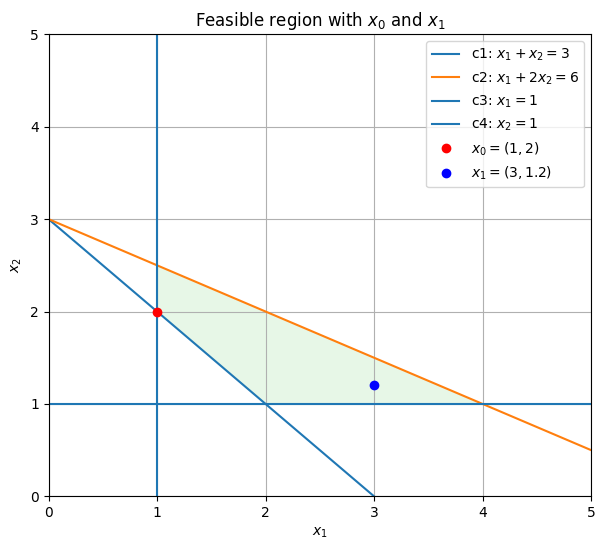

In [77]:
plt.figure(figsize=(7, 6))

# Constraint lines
plt.plot(x_vals, 3 - x_vals, label="c1: $x_1 + x_2 = 3$")
plt.plot(x_vals, (6 - x_vals)/2, label="c2: $x_1 + 2x_2 = 6$")
plt.axvline(1, label="c3: $x_1 = 1$")
plt.axhline(1, label="c4: $x_2 = 1$")

# Fill feasible region
plt.contourf(X, Y, mask, levels=[0.5, 1], colors=["#d0f0d0"], alpha=0.5)

# Add x0 and x1
plt.plot(*x0, 'ro', label='$x_0 = (1,2)$')
plt.plot(*x1, 'bo', label='$x_1 = (3,1.2)$')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Feasible region with $x_0$ and $x_1$")
plt.legend()
plt.grid(True)
plt.show()

#### Problem 1.8 — Plot objective line $2x_1 + x_2 = 4$ and confirm that $x_0$ is optimal

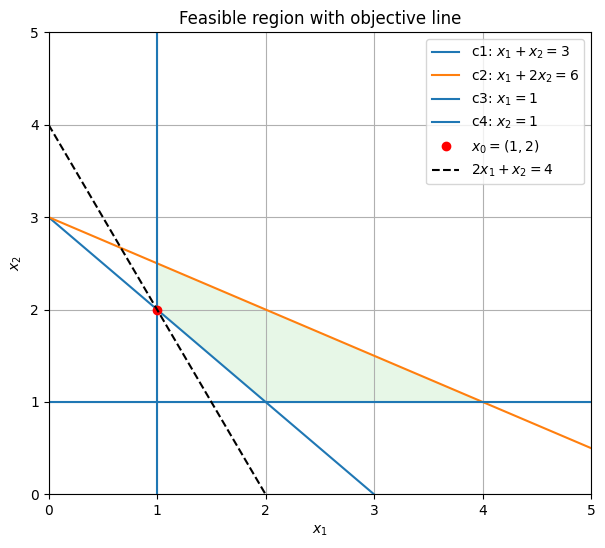

In [78]:
plt.figure(figsize=(7, 6))

# Constraint lines
plt.plot(x_vals, 3 - x_vals, label="c1: $x_1 + x_2 = 3$")
plt.plot(x_vals, (6 - x_vals)/2, label="c2: $x_1 + 2x_2 = 6$")
plt.axvline(1, label="c3: $x_1 = 1$")
plt.axhline(1, label="c4: $x_2 = 1$")

# Feasible region
plt.contourf(X, Y, mask, levels=[0.5, 1], colors=["#d0f0d0"], alpha=0.5)

# Add x0
plt.plot(*x0, 'ro', label='$x_0 = (1,2)$')

# Plot objective line 2x1 + x2 = 4 → x2 = 4 - 2x1
plt.plot(x_vals, 4 - 2*x_vals, 'k--', label='$2x_1 + x_2 = 4$')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Feasible region with objective line")
plt.legend()
plt.grid(True)
plt.show()

#### Problem 2.1 — Define constraint functions $c_i(x)$

In [79]:
def c1(x):
    return 1 - x  # x ≥ 1 → c1(x) ≤ 0

def c2(x):
    return x - 4  # x ≤ 4 → c2(x) ≤ 0

#### Problem 2.2 — Define function `is_feasible(x)`

In [80]:
def is_feasible(x):
    return c1(x) <= 0 and c2(x) <= 0

#### Problem 2.3 — Test feasibility of $x = 0$, $1$, $3$

In [81]:
x0 = 0
x1 = 1
x2 = 3

print("x = 0 → feasible?", is_feasible(x0))
print("x = 1 → feasible?", is_feasible(x1))
print("x = 3 → feasible?", is_feasible(x2))

x = 0 → feasible? False
x = 1 → feasible? True
x = 3 → feasible? True


#### Problem 2.4 — Define the Lagrangian function $L(x, \lambda) = f(x) + \lambda_1 c_1(x) + \lambda_2 c_2(x)$

In [82]:
def f(x):
    return x**2

def L(x, lamb):
    return f(x) + lamb[0] * c1(x) + lamb[1] * c2(x)

#### Problem 2.5 — Define gradient of the Lagrangian with respect to $x$: $\nabla_x L(x, \lambda) = 2x - \lambda_1 + \lambda_2$

In [83]:
def grad_L(x, lamb):
    return 2 * x - lamb[0] + lamb[1]

#### Problem 2.6 — Check KKT conditions at $x^* = 1$, $\lambda^* = (0, 2)$

In [84]:
x_star = 1
lamb_star = [0, 2]

stationarity = grad_L(x_star, lamb_star) == 0
primal = is_feasible(x_star)
dual = lamb_star[0] >= 0 and lamb_star[1] >= 0
complementary = (lamb_star[0] * c1(x_star) == 0) and (lamb_star[1] * c2(x_star) == 0)

print("Stationarity:", stationarity)
print("Primal feasibility:", primal)
print("Dual feasibility:", dual)
print("Complementary slackness:", complementary)

Stationarity: False
Primal feasibility: True
Dual feasibility: True
Complementary slackness: False


#### Problem 3.1 — Draw the lines delimiting the feasible set and annotate the feasible region

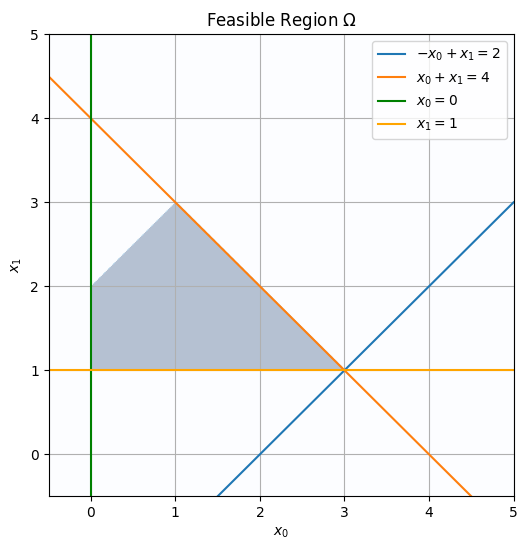

In [85]:
import numpy as np
import matplotlib.pyplot as plt

x0_vals = np.linspace(-1, 5, 400)
x1_vals = np.linspace(-1, 5, 400)
X0, X1 = np.meshgrid(x0_vals, x1_vals)

# Constraints
c1 = -X0 + X1 <= 2
c2 = X0 + X1 <= 4
c3 = X0 >= 0
c4 = X1 >= 1

# Feasible region (boolean mask)
feasible = c1 & c2 & c3 & c4

plt.figure(figsize=(6, 6))

# Plot feasible region with imshow
plt.imshow(feasible.astype(int), extent=[-1, 5, -1, 5], origin='lower',
           cmap='Blues', alpha=0.3, aspect='auto')

# Constraint lines
plt.plot(x0_vals, x0_vals - 2, label=r'$-x_0 + x_1 = 2$')
plt.plot(x0_vals, -x0_vals + 4, label=r'$x_0 + x_1 = 4$')
plt.axvline(0, color='green', label=r'$x_0 = 0$')
plt.axhline(1, color='orange', label=r'$x_1 = 1$')

plt.xlim(-0.5, 5)
plt.ylim(-0.5, 5)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title(r"Feasible Region $\Omega$")
plt.legend()
plt.grid(True)
plt.show()

#### Problem 3.2 — Write a function `is_feasible(x)` that returns True if $x \in \Omega$

In [86]:
def is_feasible(x):
    return (
        -x[0] + x[1] <= 2 and
        x[0] + x[1] <= 4 and
        x[0] >= 0 and
        x[1] >= 1
    )

#### Problem 3.3 — Write a function `active_set(x)` that returns indices of active constraints at $x$

In [87]:
def active_set(x, tol=1e-8):
    active = []
    if abs(-x[0] + x[1] - 2) < tol:
        active.append(0)
    if abs(x[0] + x[1] - 4) < tol:
        active.append(1)
    if abs(x[0]) < tol:
        active.append(2)
    if abs(x[1] - 1) < tol:
        active.append(3)
    return active

#### Problem 3.4 — Test `is_feasible` and `active_set` on:
$x = (0, 0)$, $x = (0, 4)$, $x = (1, 3)$

In [88]:
points = [np.array([0, 0]), np.array([0, 4]), np.array([1, 3])]

for x in points:
    print(f"x = {x}")
    print("Feasible?", is_feasible(x))
    print("Active constraints:", active_set(x))
    print()

x = [0 0]
Feasible? False
Active constraints: [2]

x = [0 4]
Feasible? False
Active constraints: [1, 2]

x = [1 3]
Feasible? True
Active constraints: [0, 1]



#### Problem 3.5 — Write `is_feasible_direction(x, d)` to check if $d$ is feasible at $x$

In [89]:
def is_feasible_direction(x, d, tol=1e-8):
    grads = [np.array([-1, 1]),
             np.array([1, 1]),
             np.array([1, 0]),
             np.array([0, 1])]

    actives = active_set(x)
    for i in actives:
        if grads[i] @ d < -tol:
            return False
    return True

#### Problem 3.6 — Test `is_feasible_direction` at $x = (0, 0)$ and $\bar{x} = (1, 3)$
with $d = (0, -1)$, $(1, 0)$, $(0, 1)$

In [90]:
x1 = np.array([0, 0])
x2 = np.array([1, 3])
directions = [np.array([0, -1]), np.array([1, 0]), np.array([0, 1])]

for x in [x1, x2]:
    print(f"\nTesting directions at x = {x}")
    for d in directions:
        print(f"  d = {d}, feasible?", is_feasible_direction(x, d))


Testing directions at x = [0 0]
  d = [ 0 -1], feasible? True
  d = [1 0], feasible? True
  d = [0 1], feasible? True

Testing directions at x = [1 3]
  d = [ 0 -1], feasible? False
  d = [1 0], feasible? False
  d = [0 1], feasible? True
